In [0]:
from google.colab import drive
import tensorflow as tf
import tensorflow.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import math as m

In [6]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
with open('/content/gdrive/My Drive/Colab Notebooks/fwtest.txt','w') as f:
  f.write('Hello Google Drive')

In [0]:
sess = tf.Session()

In [0]:
row_dim = 2

In [0]:
col_dim= 3

In [0]:
zero_tsr = tf.zeros([row_dim,col_dim])

In [0]:
ones_tsr = tf.ones([row_dim,col_dim])

In [0]:
filled_tsr = tf.fill([row_dim,col_dim],42)

In [0]:
constant_tsr = tf.constant([1,2,3])

In [45]:
print(zero_tsr,'\n',ones_tsr,'\n',filled_tsr,'\n',constant_tsr,'\n')

Tensor("zeros:0", shape=(2, 3), dtype=float32) 
 Tensor("ones:0", shape=(2, 3), dtype=float32) 
 Tensor("Fill:0", shape=(2, 3), dtype=int32) 
 Tensor("Const_1:0", shape=(3,), dtype=int32) 



In [46]:
print(sess.run(zero_tsr),'\n\n',sess.run(ones_tsr),'\n\n',sess.run(filled_tsr),'\n\n',sess.run(constant_tsr))

[[0. 0. 0.]
 [0. 0. 0.]] 

 [[1. 1. 1.]
 [1. 1. 1.]] 

 [[42 42 42]
 [42 42 42]] 

 [1 2 3]


In [50]:
linear_tsr = tf.linspace(start=0.,stop=1.,num=5) 
int_seq_tsr = tf.range(start=0, limit=10, delta=2) 
print(linear_tsr)
print(int_seq_tsr)
print(sess.run(linear_tsr))
print(sess.run(int_seq_tsr))

Tensor("LinSpace:0", shape=(5,), dtype=float32)
Tensor("range:0", shape=(5,), dtype=int32)
[0.   0.25 0.5  0.75 1.  ]
[0 2 4 6 8]


In [51]:
randunif_tsr = tf.random_uniform([row_dim, col_dim], minval=0, maxval=1) 
print(randunif_tsr)
print(sess.run(randunif_tsr))

Tensor("random_uniform:0", shape=(2, 3), dtype=float32)
[[0.88570344 0.00758433 0.88689566]
 [0.6005318  0.03660142 0.24216437]]


In [65]:
randnorm_tsr =tf.random_normal([row_dim, col_dim], mean=0.0, stddev=1.0) 
print(randnorm_tsr)
print(sess.run(randnorm_tsr))


Tensor("random_normal_9:0", shape=(2, 3), dtype=float32)
[[-0.15196584  1.9563981  -1.0054437 ]
 [-0.25034416  1.4554359  -1.2574427 ]]


In [74]:
truncnorm_tsr =tf.truncated_normal([row_dim, col_dim], mean=0.0, stddev=1.0) 
print(truncnorm_tsr)
print(sess.run(truncnorm_tsr))

Tensor("truncated_normal_9:0", shape=(2, 3), dtype=float32)
[[-0.78905404  0.42048386  0.10410867]
 [ 0.8980066   0.08011272 -0.54780585]]


In [0]:
my_var = tf.Variable(tf.zeros([row_dim,col_dim]))

In [0]:
initialize_op = tf.global_variables_initializer ()

In [0]:
sess.run(initialize_op)

In [83]:
print(sess.run(my_var))

[[0. 0. 0.]
 [0. 0. 0.]]


In [91]:
x = tf.placeholder(tf.float32, shape=[2,2]) 
y = tf.identity(x)
x_vals = np.random.rand(2,2)
sess.run(x,feed_dict={x:x_vals})

array([[0.5567364 , 0.47806665],
       [0.06007449, 0.05088395]], dtype=float32)

In [92]:
sess.run(y, feed_dict={x: x_vals})

array([[0.5567364 , 0.47806665],
       [0.06007449, 0.05088395]], dtype=float32)

In [0]:
def my_circle(r): 
  return((m.pi*(r*r)))


In [94]:
print(my_circle(10)) 
# 텐서화를 통해 my_circle의 리턴값을 탠서로 바꿔줌. tf.cast가 그 역할 첫번째 인자는 바꿀 값, 두번째는 타입
print(sess.run(tf.cast(my_circle(10),tf.float32)))

314.1592653589793
314.15927


In [98]:
x=tf.linspace(start=-7.0, stop=7.0, num=15) 
print(x)
print(sess.run(x))

Tensor("LinSpace_2:0", shape=(15,), dtype=float32)
[-7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.]


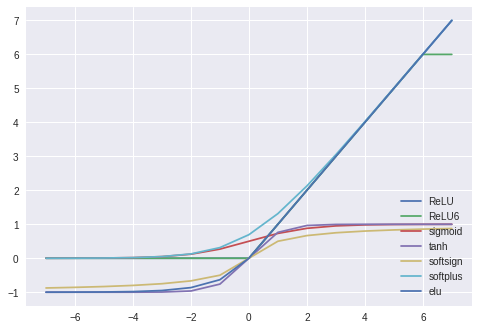

In [109]:
y1=nn.relu(x)
plt.plot(sess.run(x), sess.run(y1), label='ReLU') 
y2=nn.relu6(x)
plt.plot(sess.run(x), sess.run(y2), label='ReLU6') 
y3=nn.sigmoid(x)
plt.plot(sess.run(x), sess.run(y3), label='sigmoid') 
y4=nn.tanh(x)
plt.plot(sess.run(x), sess.run(y4), label='tanh') 
y5=nn.softsign(x)
plt.plot(sess.run(x), sess.run(y5), label='softsign') 
y6=nn.softplus(x)
plt.plot(sess.run(x), sess.run(y6), label='softplus') 
y7=nn.elu(x)
plt.plot(sess.run(x), sess.run(y7), label='elu')

plt.legend(loc='lower right')

In [112]:
print(sess.run(tf.cross([10.,100.,1000.],[0.1, 0.01, 0.001])))

[-9.9      99.99     -9.900001]


In [0]:
my_array = np.array([[1., 3., 5., 7., 9.], [-2.,0.,2.,4.,6.],[-6.,-3.,0.,3.,6.]])

In [0]:
x_vals = np.array([my_array, my_array+1])

In [115]:
print(x_vals)

[[[ 1.  3.  5.  7.  9.]
  [-2.  0.  2.  4.  6.]
  [-6. -3.  0.  3.  6.]]

 [[ 2.  4.  6.  8. 10.]
  [-1.  1.  3.  5.  7.]
  [-5. -2.  1.  4.  7.]]]


In [0]:
x_data=tf.placeholder(tf.float32, shape=np.shape(my_array))

In [0]:
m1=tf.constant([[1.],[0.],[-1.],[2.],[4]])

In [0]:
m2=tf.constant([[2.]])

In [0]:
a1=tf.constant([[10.]])

In [0]:
prod1=tf.matmul(x_data,m1)

In [0]:
prod2=tf.matmul(prod1,m2)

In [0]:
add1=tf.add(prod2,a1)

In [123]:
for x_val in x_vals: 
  print(sess.run(add1,feed_dict={x_data:x_val}))

[[102.]
 [ 66.]
 [ 58.]]
[[114.]
 [ 78.]
 [ 70.]]


In [131]:
unscaled_logits = tf.constant([[1.,-3.,10.]])
target_dist = tf.constant([[0.1,0.98,0.88]])
softmax_xentropy = tf.nn.softmax_cross_entropy_with_logits(labels=target_dist, logits=unscaled_logits) 
print(sess.run(softmax_xentropy))


[13.640247]


In [132]:
unscaled_logits = tf.constant([[1.,-3.,10.]])
sparse_target_dist = tf.constant([1])
sparse_xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=sparse_target_dist, logits=unscaled_logits)
print(sess.run(sparse_xentropy))

[13.000126]


In [0]:
# Data Setup
x_data = np.array([[0,0],[1,0],[1,1],[0,1]]) 
y_data = np.array([[0],[1],[0],[1]])
# Model setting
X=tf.placeholder(tf.float32) 
Y=tf.placeholder(tf.float32)
W=tf.Variable(tf.random_uniform([2,1],-1.,1.)) 
b=tf.Variable(tf.zeros([1]))
L=tf.add(tf.matmul(X,W),b) 
L=tf.nn.sigmoid(L)
# loss and optimizer definition
loss = nn.l2_loss(Y-L)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1) 
train_op = optimizer.minimize(loss)

In [0]:
init=tf.global_variables_initializer()

In [0]:
sess.run(init)

In [139]:
for i in range(5000):
  sess.run(train_op, feed_dict={X:x_data, Y:y_data}) 
  if (i+1)%100 == 0:
    temp_loss = sess.run(loss, feed_dict={X:x_data, Y:y_data}) 
    print(i+1,temp_loss)

100 0.5129864
200 0.5056433
300 0.5025061
400 0.50111246
500 0.5004962
600 0.5002225
700 0.5001002
800 0.5000453
900 0.5000205
1000 0.5000093
1100 0.5000042
1200 0.5000019
1300 0.50000083
1400 0.5000004
1500 0.50000024
1600 0.5
1700 0.5
1800 0.5
1900 0.5
2000 0.5
2100 0.50000006
2200 0.5
2300 0.5
2400 0.5
2500 0.5
2600 0.5
2700 0.5
2800 0.5
2900 0.49999997
3000 0.5
3100 0.49999994
3200 0.5
3300 0.5
3400 0.5
3500 0.49999994
3600 0.49999997
3700 0.49999997
3800 0.49999997
3900 0.5
4000 0.5
4100 0.5
4200 0.5
4300 0.5
4400 0.5
4500 0.5
4600 0.5
4700 0.5
4800 0.5
4900 0.5
5000 0.5


100 0.50312376
200 0.49902382
300 0.49481195
400 0.48901778
500 0.47931555
600 0.4607408
700 0.42211348
800 0.3433843
900 0.22140673
1000 0.11548594
1100 0.060459815
1200 0.035572995
1300 0.023387449
1400 0.016698427
1500 0.012652088
1600 0.0100122895
1700 0.00818668
1800 0.006865211
1900 0.005873259
2000 0.0051064063
2100 0.004499019
2200 0.00400806
2300 0.0036043415
2400 0.0032674305
2500 0.0029826625
2600 0.0027392798
2700 0.0025292232
2800 0.0023463406
2900 0.0021858888
3000 0.002044129
3100 0.0019180914
3200 0.0018054028
3300 0.0017041273
3400 0.0016126719
3500 0.0015297274
3600 0.0014542025
3700 0.0013851817
3800 0.001321885
3900 0.0012636569
4000 0.0012099348
4100 0.0011602254
4200 0.0011141156
4300 0.0010712473
4400 0.0010312927
4500 0.0009939775
4600 0.0009590584
4700 0.00092631864
4800 0.00089556933
4900 0.0008666388
5000 0.0008393721


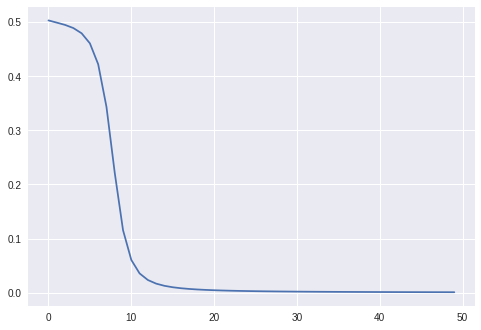

In [149]:
# Data Setup
x_data = np.array([[0,0],[1,0],[1,1],[0,1]]) 
y_data = np.array([[0],[1],[0],[1]])
# Model setting
X=tf.placeholder(tf.float32) 
Y=tf.placeholder(tf.float32)
W1=tf.Variable(tf.random_uniform([2,5],-1.,1.))
b1=tf.Variable(tf.zeros([5]))
W2=tf.Variable(tf.random_uniform([5,1],-1.,1.)) 
b2=tf.Variable(tf.zeros([1]))
H=tf.nn.softplus(tf.add(tf.matmul(X,W1),b1))
L=tf.nn.sigmoid(tf.add(tf.matmul(H,W2),b2))
model=tf.nn.sigmoid(L)
loss = nn.l2_loss(Y-L)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1) 
train_op = optimizer.minimize(loss)
# initialize and learn
init=tf.global_variables_initializer()
sess = tf.Session() 
sess.run(init)
loss_step=[]
for i in range(5000):
  sess.run(train_op, feed_dict={X:x_data, Y:y_data})
  if (i+1)%100 == 0:
    temp_loss = sess.run(loss, feed_dict={X:x_data, Y:y_data})
    print(i+1,temp_loss )
    loss_step.append(temp_loss)
    
plt.plot(loss_step)